# Import Necessary library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Reading the Data

In [4]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

# Explore the Data

In [5]:
df.shape

(150, 5)

**we can see the data have 150 row and 5 columns**

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**we can see when show the data we found 5 columns are sepal_length	sepal_width	petal_length petal_width species**

In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**we find n missing value in the data**

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**we found the data are balanced and diff between mean and max and min is normal**

In [10]:
df.duplicated().sum()

3

**i have 3 duplicated value in data and i will remove this when clean the data**

In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**we don't have missing value**

# Cleaning the Data

In [12]:
df.drop_duplicates(inplace= True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


**Drop the duplicated from data**

# Analysis and visualization

In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
valuecount = df['species'].value_counts().reset_index()
valuecount

,species,count
0,Iris-versicolor,50
1,Iris-virginica,49
2,Iris-setosa,48


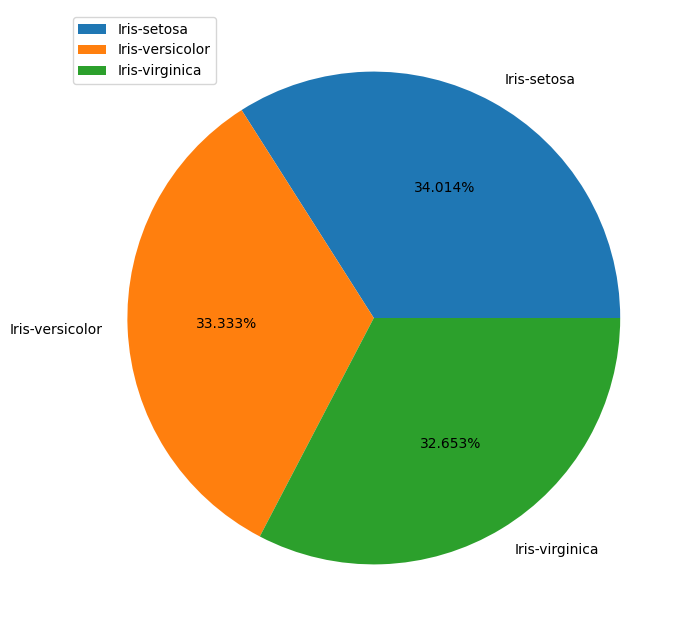

In [16]:
plt.figure(figsize=(8,8))
plt.pie(valuecount['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

**This pie show the diff betweeb every species and another species**

In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<h2>sepal_length	sepal_width	<h2>

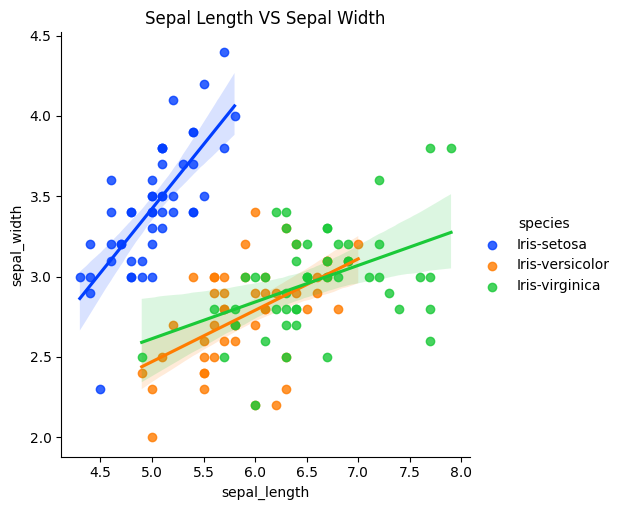

In [18]:
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

<h2>petal_length	petal_width<h2>

In [19]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


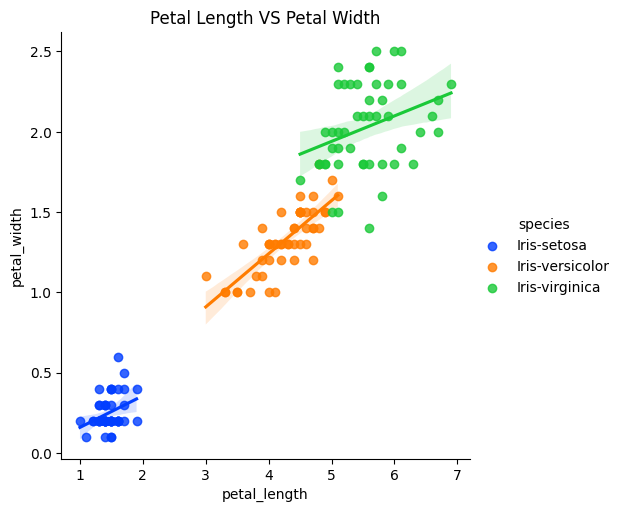

In [20]:
sns.lmplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Petal Length VS Petal Width")
plt.show()

# Split the Data

In [21]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [22]:
X = df.drop(columns='species')
Y = df['species']

In [23]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64

In [25]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [26]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
41,4.5,2.3,1.3,0.3
57,4.9,2.4,3.3,1.0
141,6.9,3.1,5.1,2.3
134,6.1,2.6,5.6,1.4
52,6.9,3.1,4.9,1.5
...,...,...,...,...
60,5.0,2.0,3.5,1.0
21,5.1,3.7,1.5,0.4
51,6.4,3.2,4.5,1.5
66,5.6,3.0,4.5,1.5


In [27]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
97,6.2,2.9,4.3,1.3
58,6.6,2.9,4.6,1.3
74,6.4,2.9,4.3,1.3
92,5.8,2.6,4.0,1.2
138,6.0,3.0,4.8,1.8
126,6.2,2.8,4.8,1.8
105,7.6,3.0,6.6,2.1
137,6.4,3.1,5.5,1.8
67,5.8,2.7,4.1,1.0
40,5.0,3.5,1.3,0.3


In [28]:
Y_train

41     0
57     1
141    2
134    2
52     1
      ..
60     1
21     0
51     1
66     1
70     1
Name: species, Length: 117, dtype: int64

In [29]:
y_test

97     1
58     1
74     1
92     1
138    2
126    2
105    2
137    2
67     1
40     0
59     1
100    2
30     0
99     1
131    2
11     0
1      0
69     1
84     1
2      0
39     0
98     1
19     0
95     1
139    2
10     0
47     0
120    2
15     0
12     0
Name: species, dtype: int64

<h2>Visualization the realtion between the columns using corr<h2>

In [30]:
dfcorr = df.drop(columns = 'species', axis=1)

In [31]:
dfcorr

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
dfcorr.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


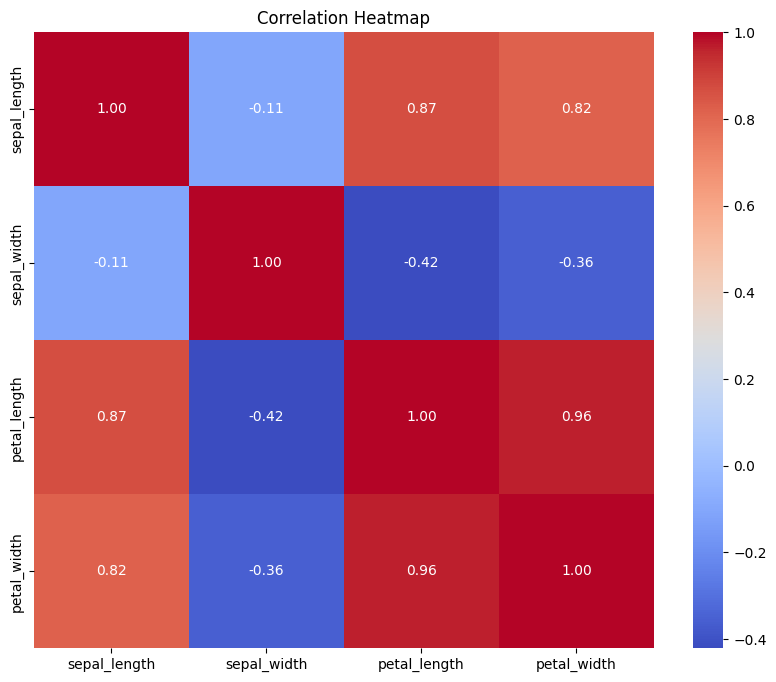

In [33]:
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(dfcorr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Logistic Regression Model

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
logmodel.score(x_test,y_test)

1.0

In [37]:
logmodel.score(X_train, Y_train)

0.9743589743589743

In [38]:
logmodel.predict([[5.1,3.5,1.4,0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])